In [34]:
import json
import requests
import pandas as pd
import os

# Load the dataframes you want to work with
df_stations = pd.read_csv('citybikedata.csv')
df_all_fsq_pois = pd.read_csv('combined_foursquare_data.csv')  # Updated file name
df_all_yelp_pois = pd.read_csv('combined_yelp_data.csv')  # Updated file name

# Question-1: Join the data from Part 1 with the data from Part 2 to create a new dataframe.
# Drop duplicate columns from fsq data
fsq_columns_to_drop = ["latitude", "longitude", "Num_Bikes", "Empty_slots"]  # Updated column names
df_all_fsq_pois_v2 = df_all_fsq_pois.drop(columns=fsq_columns_to_drop)

# Drop duplicate columns from yelp data
yelp_columns_to_drop = ["latitude", "longitude", "Num_Bikes", "Empty_slots"]  # Updated column names
df_all_yelp_pois_v2 = df_all_yelp_pois.drop(columns=yelp_columns_to_drop)

# Merge the citybike, fsq, and yelp data
merged_df_citybik_fsq = pd.merge(df_stations, df_all_fsq_pois_v2, left_on='Station Name', right_on='Station Name', how='inner')  # Updated column name
merged_df_citybik_fsq_yelp = pd.merge(merged_df_citybik_fsq, df_all_yelp_pois_v2, left_on='Station Name', right_on='Station Name', how='inner')  # Updated column name

print('\nTHIS IS CITYBIK, FOURSQUARE, AND YELP DATA COMBINED')
print(merged_df_citybik_fsq_yelp)

# Convert dataframe to csv for better understanding of data.
merged_df_citybik_fsq_yelp.to_csv('mergeddata.csv', index=False)






THIS IS CITYBIK, FOURSQUARE, AND YELP DATA COMBINED
            Station Name   latitude  longitude  Num_Bikes  Empty_slots  \
0              Gaol Walk  51.893604  -8.494174         10           17   
1      Fitzgerald's Park  51.895553  -8.493413         12            3   
2              Bandfield  51.895806  -8.489136         20           12   
3            Dyke Parade  51.897185  -8.484585          7           12   
4            Pope's Quay  51.901632  -8.477385         16            2   
5         North Main St.  51.899747  -8.478440          4           11   
6            Grattan St.  51.898474  -8.479780          5            5   
7        Wandesford Quay  51.896492  -8.480040         14           11   
8             Bishop St.  51.894688  -8.479027         11            4   
9            Camden Quay  51.901054  -8.473342          2           17   
10       Corn Market St.  51.900000  -8.477000         17            5   
11           Lapp's Quay  51.898144  -8.465735          8  

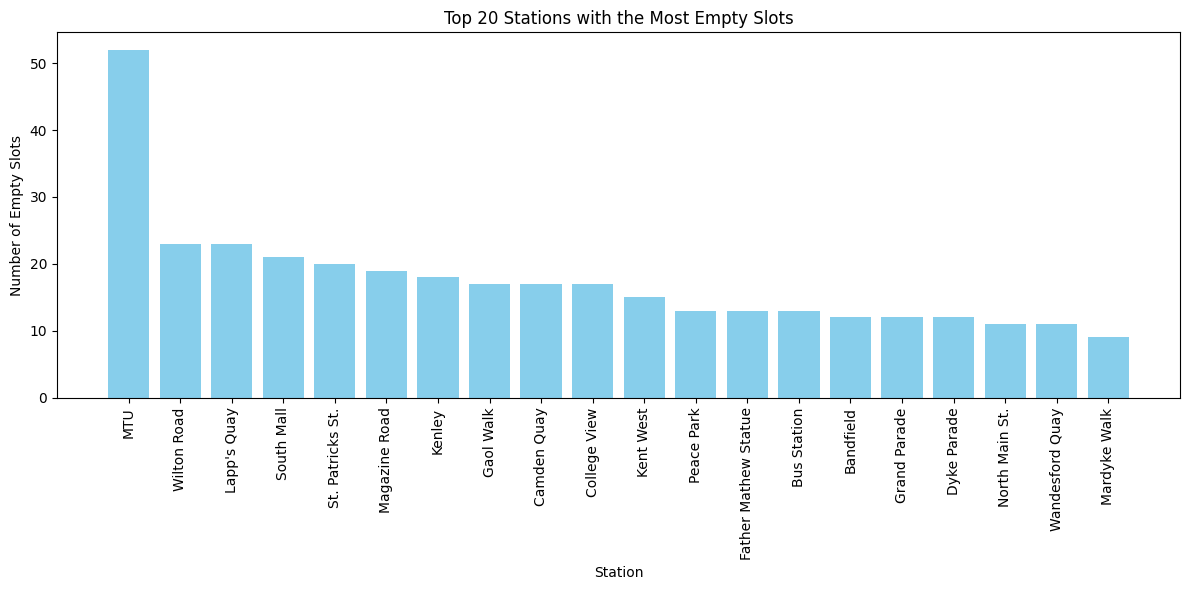

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load bike stations data
bike_stations_df = pd.read_csv('citybikedata.csv')  # Updated file name

# Sort the stations by the number of empty slots in descending order and select the top 20
top_20_stations = bike_stations_df.sort_values(by='Empty_slots', ascending=False).head(20)  # Updated column name

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_20_stations['Station Name'], top_20_stations['Empty_slots'], color='skyblue')  # Updated column name
plt.title('Top 20 Stations with the Most Empty Slots')
plt.xlabel('Station')
plt.ylabel('Number of Empty Slots')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



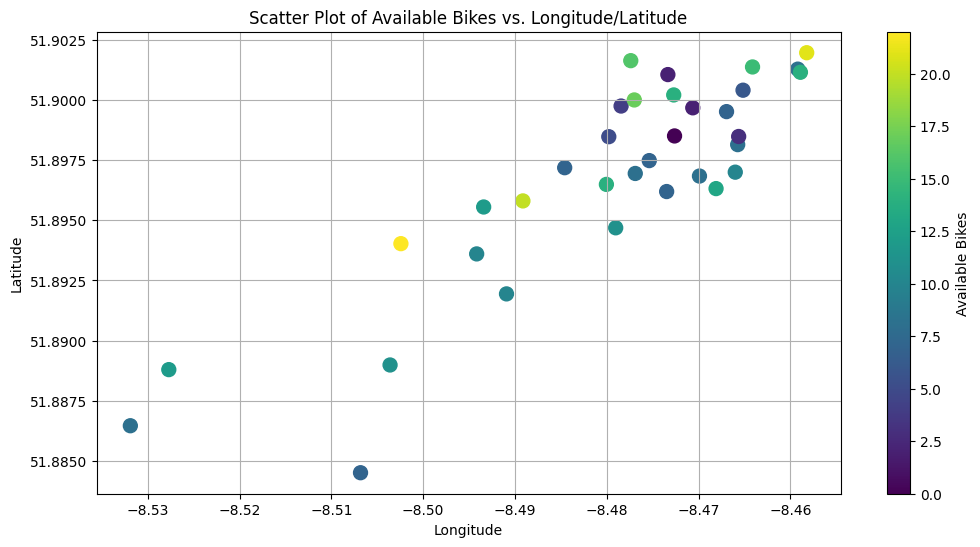

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load bike stations data
bike_stations_df = pd.read_csv('citybikedata.csv')  # Load the CityBikes data

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(bike_stations_df['longitude'], bike_stations_df['latitude'], c=bike_stations_df['Num_Bikes'], cmap='viridis', s=100)
plt.title('Scatter Plot of Available Bikes vs. Longitude/Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Available Bikes')
plt.grid(True)
plt.show()



In [40]:
import sqlite3
import json
import pandas as pd

# Function to convert lists to JSON-encoded strings
def list_to_json(lst):
    return json.dumps(lst)

# Load the dataframes you want to work with
df_all_fsq_pois = pd.read_csv('combined_foursquare_data.csv')  # Updated file name
df_all_yelp_pois = pd.read_csv('combined_yelp_data.csv')  # Updated file name

# Create a connection to the SQLite database in the same directory as the CSV files
db_file_path = 'combined_citybik_fsq_yelp.db'
conn = sqlite3.connect(db_file_path)

# Modify the DataFrames to store lists as JSON-encoded strings
df_all_fsq_pois['Foursquare POIS data'] = df_all_fsq_pois['Foursquare POIS data'].apply(list_to_json)
df_all_yelp_pois['Yelp POIS data'] = df_all_yelp_pois['Yelp POIS data'].apply(list_to_json)

# Convert fsq DataFrame to SQLite without specifying data types
df_all_fsq_pois.to_sql('table_df_citybik_fsq', conn, if_exists='replace', index=False)

# Convert yelp DataFrame to SQLite without specifying data types
df_all_yelp_pois.to_sql('table_df_citybik_yelp', conn, if_exists='replace', index=False)

# Verify fsq table by reading from the database
query = "SELECT * FROM table_df_citybik_fsq LIMIT 5"
fsq_result = pd.read_sql_query(query, conn)

# Verify yelp table by reading from the database
query = "SELECT * FROM table_df_citybik_yelp LIMIT 5"
yelp_result = pd.read_sql_query(query, conn)

# Print the tables to verify
print("Foursquare Data:")
print(fsq_result)

print("\nYelp Data:")
print(yelp_result)

# Close the database connection
conn.close()


Foursquare Data:
        Station Name   latitude  longitude  Num_Bikes  Empty_slots  \
0          Gaol Walk  51.893604  -8.494174         13           14   
1  Fitzgerald's Park  51.895553  -8.493413          6            9   
2          Bandfield  51.895806  -8.489136          8           22   
3        Dyke Parade  51.897185  -8.484585          8           10   
4        Pope's Quay  51.901632  -8.477385         15            3   

                                Foursquare POIS data  \
0  "[{'POI Name': 'Bierhouse The', 'Full POI Loca...   
1  "[{'POI Name': 'Bierhouse The', 'Full POI Loca...   
2  "[{'POI Name': 'Bierhouse The', 'Full POI Loca...   
3  "[{'POI Name': 'Bierhouse The', 'Full POI Loca...   
4  "[{'POI Name': 'Bierhouse The', 'Full POI Loca...   

   Shortest FSQ Distance from Station  
0                                1370  
1                                1243  
2                                 962  
3                                 614  
4                        